<a href="https://colab.research.google.com/github/sravyagadam/EDA_Capstone/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go

In [30]:
!git clone https://github.com/sravyagadam/EDA_Capstone.git

Cloning into 'EDA_Capstone'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [3]:
% cd EDA_Capstone/

/content/EDA_Capstone


In [4]:

airbnb=pd.read_csv('Airbnb NYC 2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb.shape

(48895, 16)

In [ ]:
airbnb['neighbourhood_group'].unique()

airbnb['neighbourhood'].unique()

airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# time for cleaning the data set check if any null values are there and remove them / make it as 0
airbnb['reviews_per_month'].fillna(0,inplace=True)

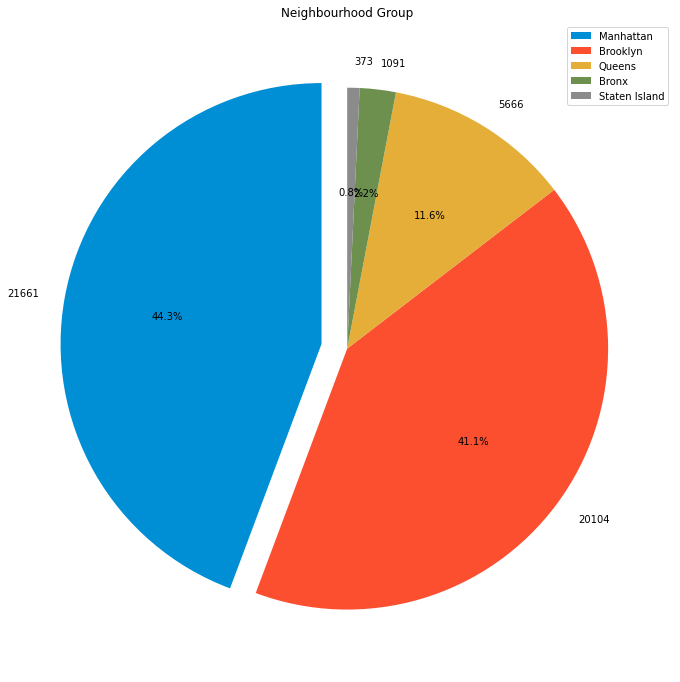

In [ ]:
labels = airbnb.neighbourhood_group.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b','#00FFFF']
explode = (0.1,0,0,0,0)
shape = airbnb.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [ ]:
airbnb.neighbourhood.value_counts().head(50)

Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood                     423
Greenwich Vill

total number of neighbourhood  221


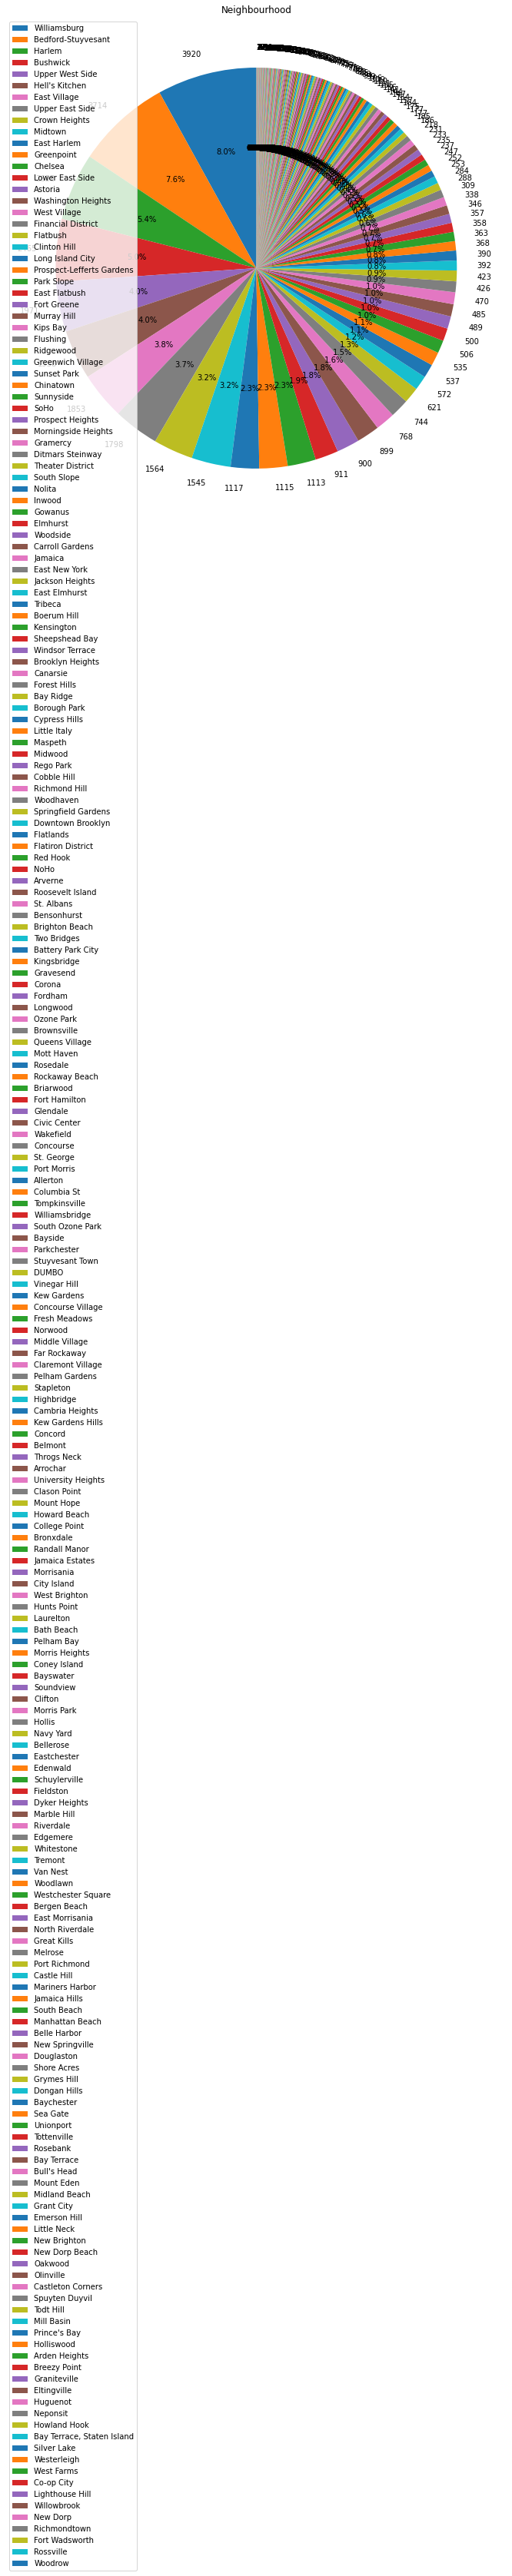

In [ ]:
labels = airbnb.neighbourhood.value_counts().index
print ("total number of neighbourhood ",len(labels))
shape = airbnb.neighbourhood.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, labels=shape, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood')
plt.show()

In [31]:
#airbnb_1=airbnb.nlargest(100, 'number_of_reviews')

#airbnb_reviews=airbnb.groupby('neighbourhood_group').count()
#airbnb_reviews
#airbnb_reviews=airbnb.groupby('neighbourhood').count()

neigh_grp_reviews=airbnb[['neighbourhood_group','number_of_reviews']]
neigh_grp_reviews=neigh_grp_reviews.groupby(by='neighbourhood_group')
airbnb_reviews=neigh_grp_reviews.sum()
airbnb_reviews
#price_avg=airbnb.number_of_reviews.mean();
#print ("reviews",price_avg)

,number_of_reviews
neighbourhood_group,
Bronx,28371
Brooklyn,486574
Manhattan,454569
Queens,156950
Staten Island,11541


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<Figure size 720x576 with 0 Axes>

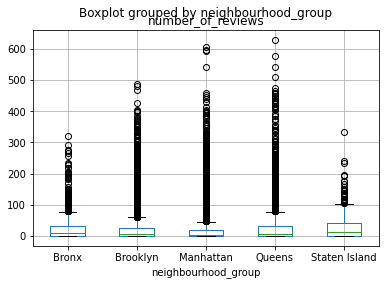

In [39]:
#plt.figure(figsize=(14,12))
#airbnb_reviews.boxplot(rot=45,subplots=False, fontsize=12)
fig = plt.figure(figsize=(10,8))
plt.suptitle('')
airbnb.boxplot(column=['number_of_reviews'], by='neighbourhood_group')
#sns.boxplot(y='number_of_reviews',x='neighbourhood_group',data =airbnb_reviews)
#plt.title('Neighbourhood Group Price Distribution')
#plt.show()